In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

from ricco_data import ricco

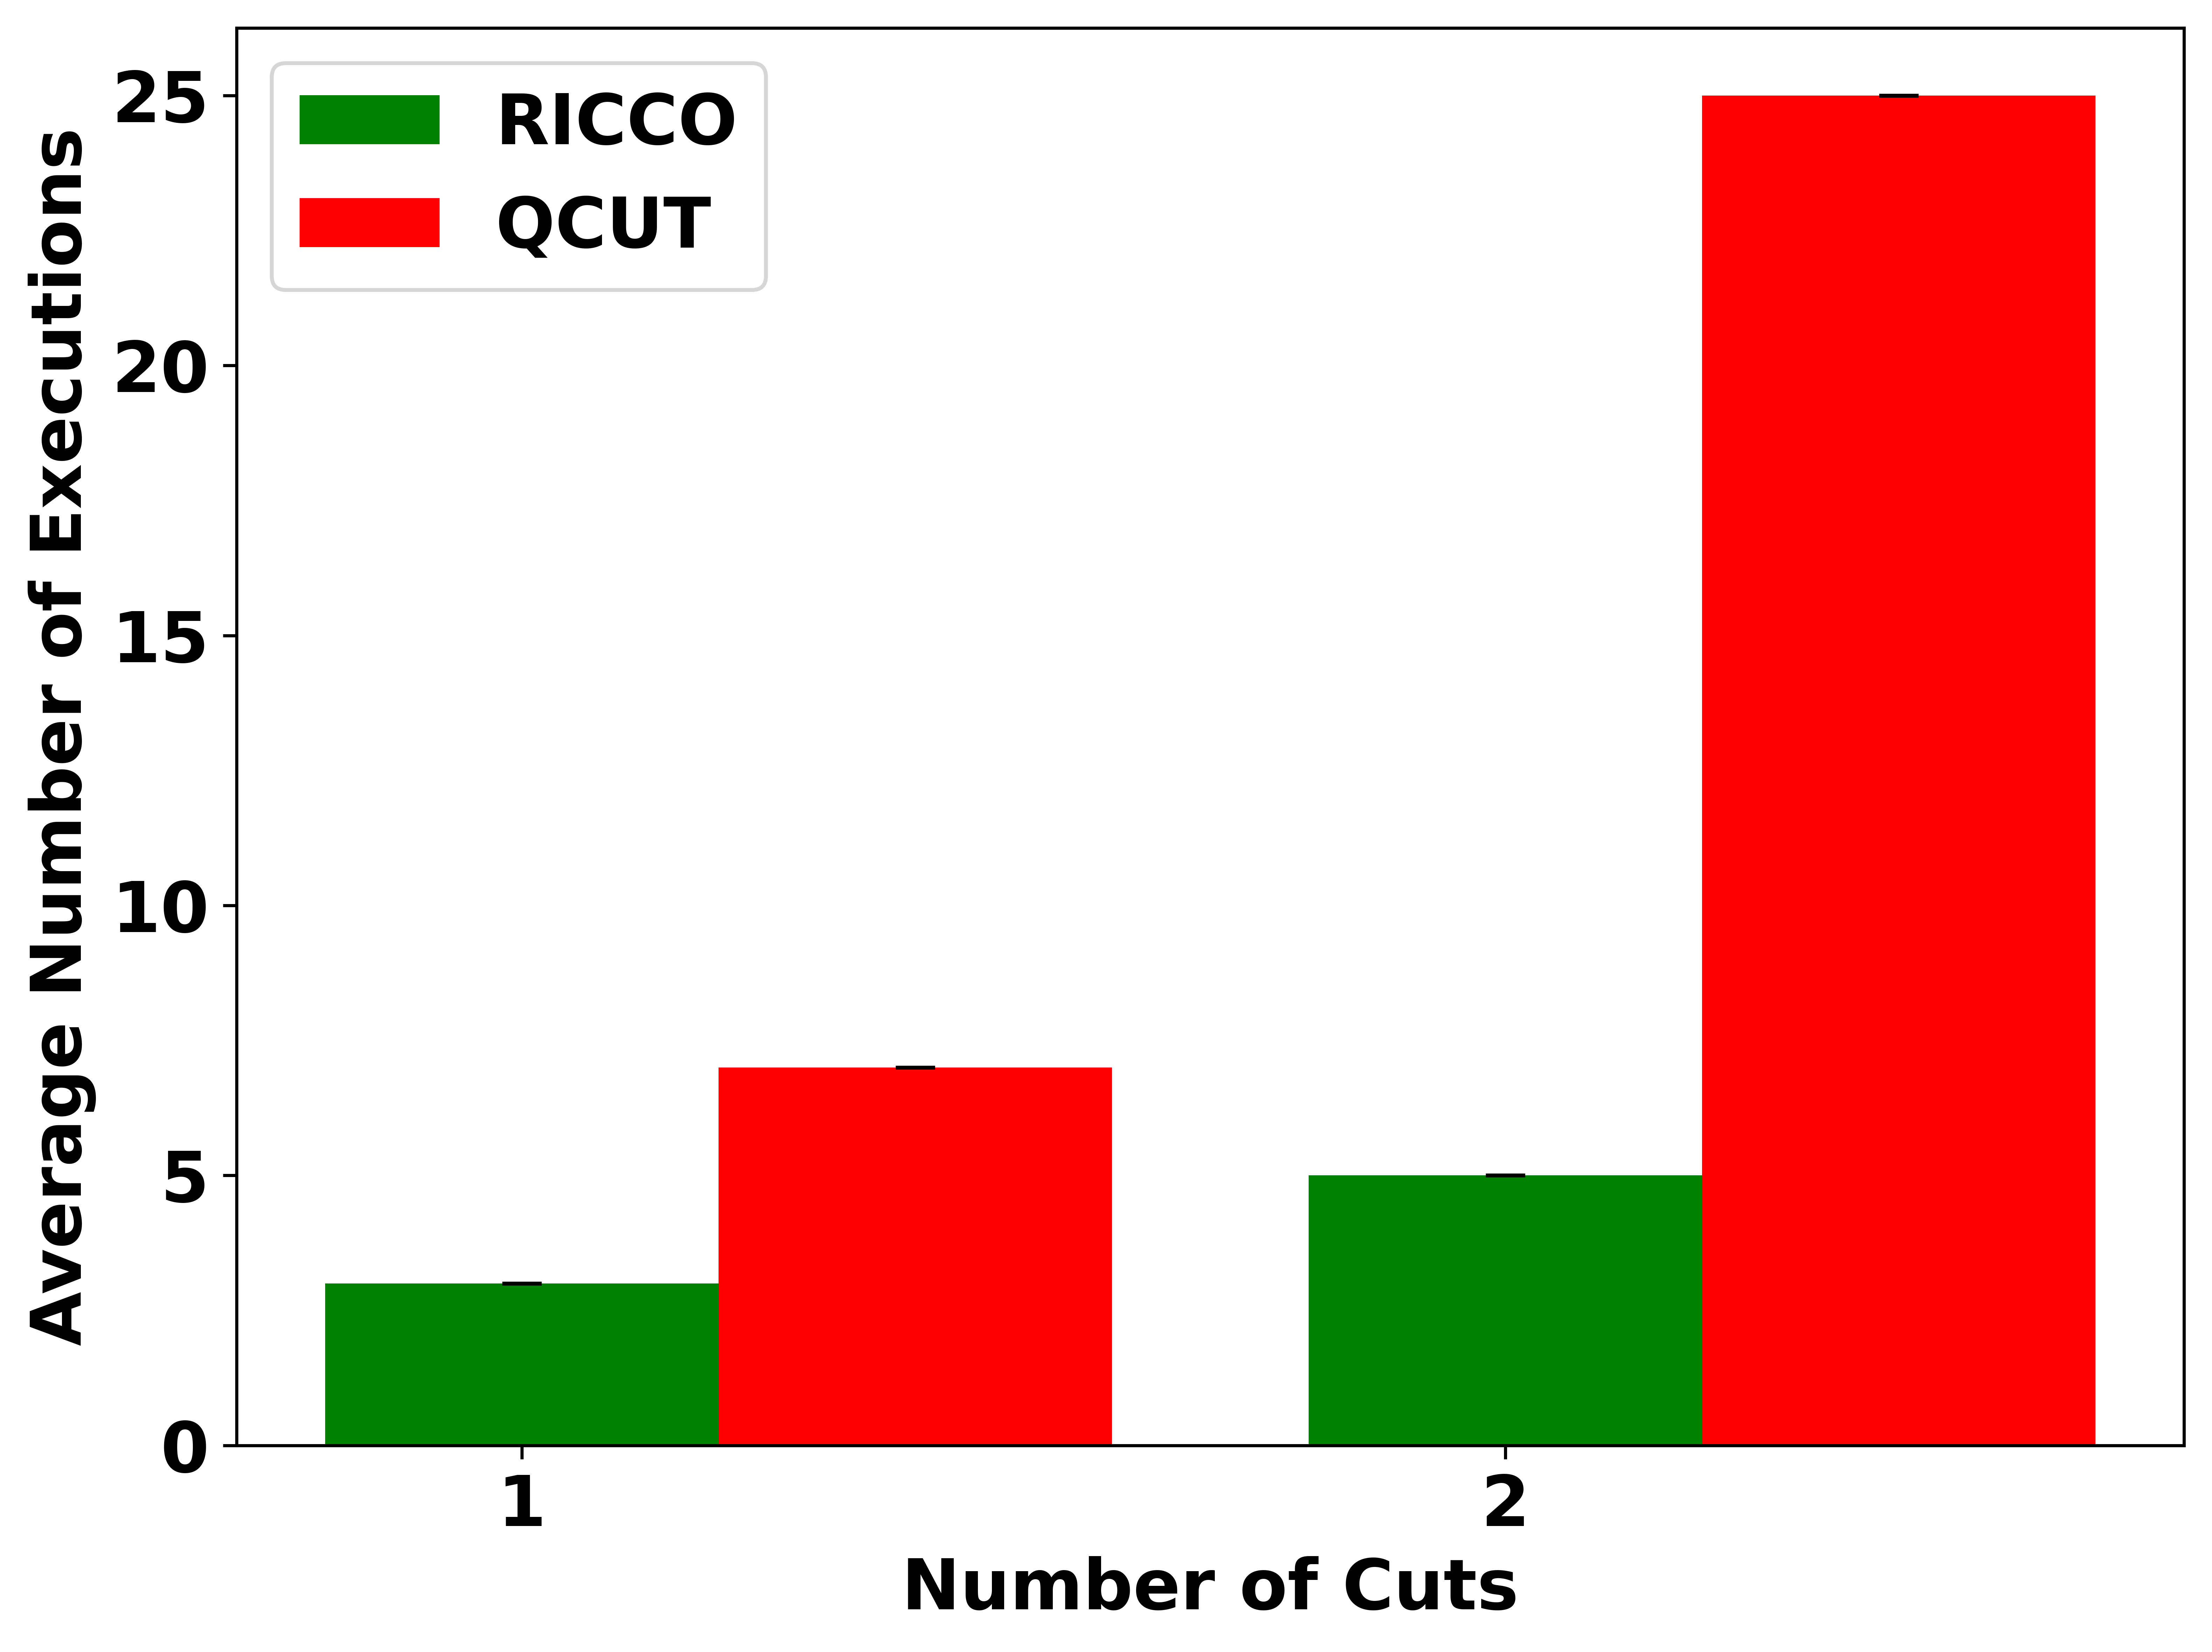

'empirical_plots/ricco_cutqc_executions.pdf'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('df_main.csv')

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=800)  # High DPI for clarity

# Define colors for the methods
colors = {'RICCO': 'green', 'QCUT': 'red'}

# Group the data by 'Number of cuts' and 'Method'
grouped = df.groupby(['Number of cuts', 'Method'])['Number of executions'].mean().unstack()

# Calculate mean and standard deviation for error bars
mean_values = df.groupby(['Number of cuts', 'Method'])['Number of executions'].mean().unstack()
std_values = df.groupby(['Number of cuts', 'Method'])['Number of executions'].std().unstack()

# Plot the bar chart for each method
bar_width = 0.4
for method in reversed(grouped.columns):
    # print(method)
    ax.bar(grouped.index + (0.4 if method == 'QCUT' else -0.0),  # Adjust position for each bar
           # grouped[method],
           # width=0.4, 
           # label=method,           
           mean_values[method],
           yerr=std_values[method],  # Add error bars
           capsize=5,  # Size of error bar caps
           width=bar_width,
           label=method,
           color=colors.get(method, 'blue'))

# Add labels with larger font sizes for readability
ax.set_xlabel("Number of Cuts", fontsize=18, fontweight='bold')
ax.set_ylabel("Average Number of Executions", fontsize=18, fontweight='bold')

# Format the y-axis for scientific notation
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Customize tick labels
ax.set_xticks(grouped.index)
ax.set_xticklabels(grouped.index, fontsize=18, fontweight='bold')
for label in ax.get_yticklabels():
    label.set_fontsize(18)
    label.set_fontweight('bold')

# Ensure bold formatting for the scientific notation text
ax.yaxis.offsetText.set_fontsize(18)
ax.yaxis.offsetText.set_fontweight('bold')

# Turn off the grid
ax.grid(False)

# Add a legend
# ax.legend(prop={'size': 18, 'weight': 'bold'}, title="Method", title_fontsize=18, loc='upper left')
ax.legend(prop={'size': 18, 'weight': 'bold'}, loc='upper left')

# Use tight layout to ensure proper centering and spacing
fig.tight_layout()

# Save the plot
output_path = 'empirical_plots/ricco_cutqc_executions.pdf'
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

output_path


In [ ]:
# number_of_cuts_vs_executions_ricco_optimization
# ricco_cutqc_expectation_error_95ci
# ricco_cutqc_executions

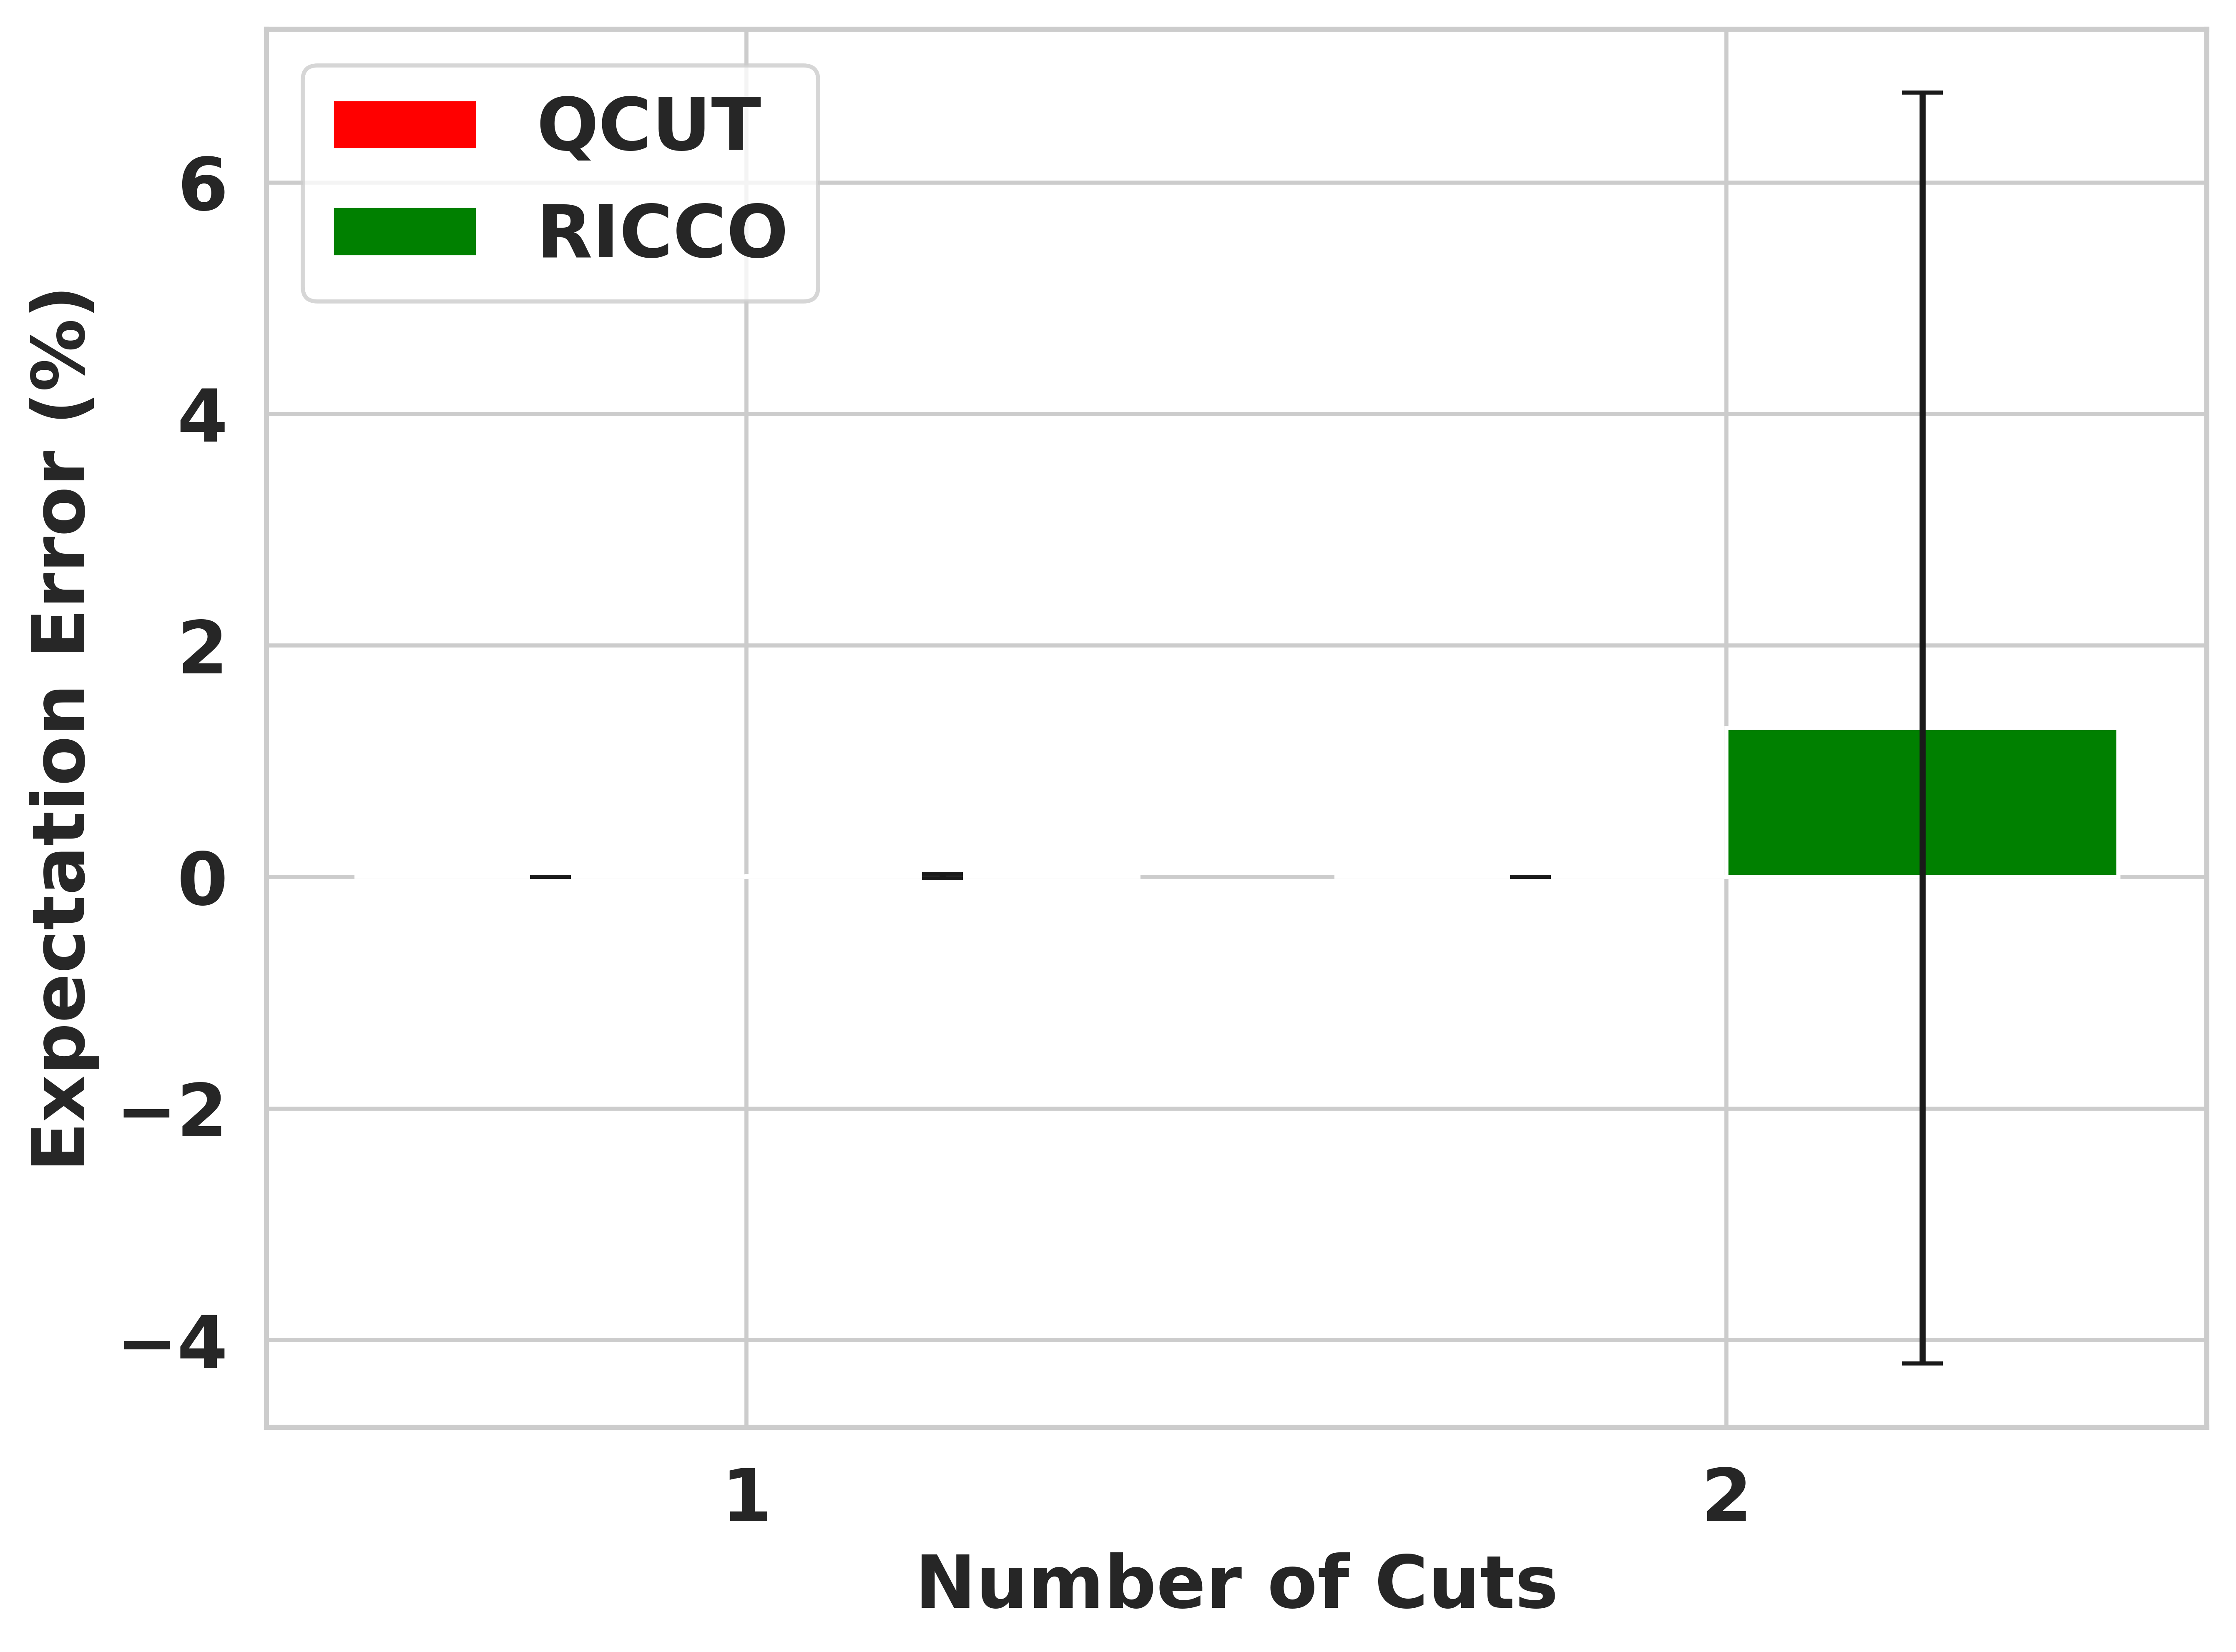

'empirical_plots/ricco_cutqc_expectation_error.pdf'

In [62]:
# Re-run the modified code after the connection issue
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
df = pd.read_csv('df_main.csv')


# Correct the dataset by removing negative values for 'Expectation error (%)'
df['Expectation error (%)'] = df['Expectation error (%)'].abs()

# Calculate mean and standard deviation for 'Expectation error (%)'
mean_values = df.groupby(['Number of cuts', 'Method'])['Expectation error (%)'].mean().unstack()
std_values = df.groupby(['Number of cuts', 'Method'])['Expectation error (%)'].std().unstack()

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=700)  # High DPI for clarity

# Define colors for the methods
colors = {'RICCO': 'green', 'QCUT': 'red'}

# Plot the bar chart with error bars for each method
bar_width = 0.4
x_positions = mean_values.index
for i, method in enumerate(mean_values.columns):
    ax.bar(x_positions + (i - 0.5) * bar_width,  # Adjust position for each bar
           mean_values[method],
           yerr=std_values[method],  # Add error bars
           capsize=5,  # Size of error bar caps
           width=bar_width,
           label=method,
           color=colors.get(method, 'blue'))

# Add labels with larger font sizes for readability
ax.set_xlabel("Number of Cuts", fontsize=18, fontweight='bold')
ax.set_ylabel("Expectation Error (%)", fontsize=18, fontweight='bold')

# Customize tick labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_positions, fontsize=18, fontweight='bold')
for label in ax.get_yticklabels():
    label.set_fontsize(18)
    label.set_fontweight('bold')

# Ensure bold formatting for the scientific notation text
ax.yaxis.offsetText.set_fontsize(18)
ax.yaxis.offsetText.set_fontweight('bold')

# Add a legend
ax.legend(prop={'size': 18, 'weight': 'bold'}, loc='upper left')

# Use tight layout to ensure proper centering and spacing
fig.tight_layout()

# Save the plot
output_path = 'empirical_plots/ricco_cutqc_expectation_error.pdf'
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

output_path


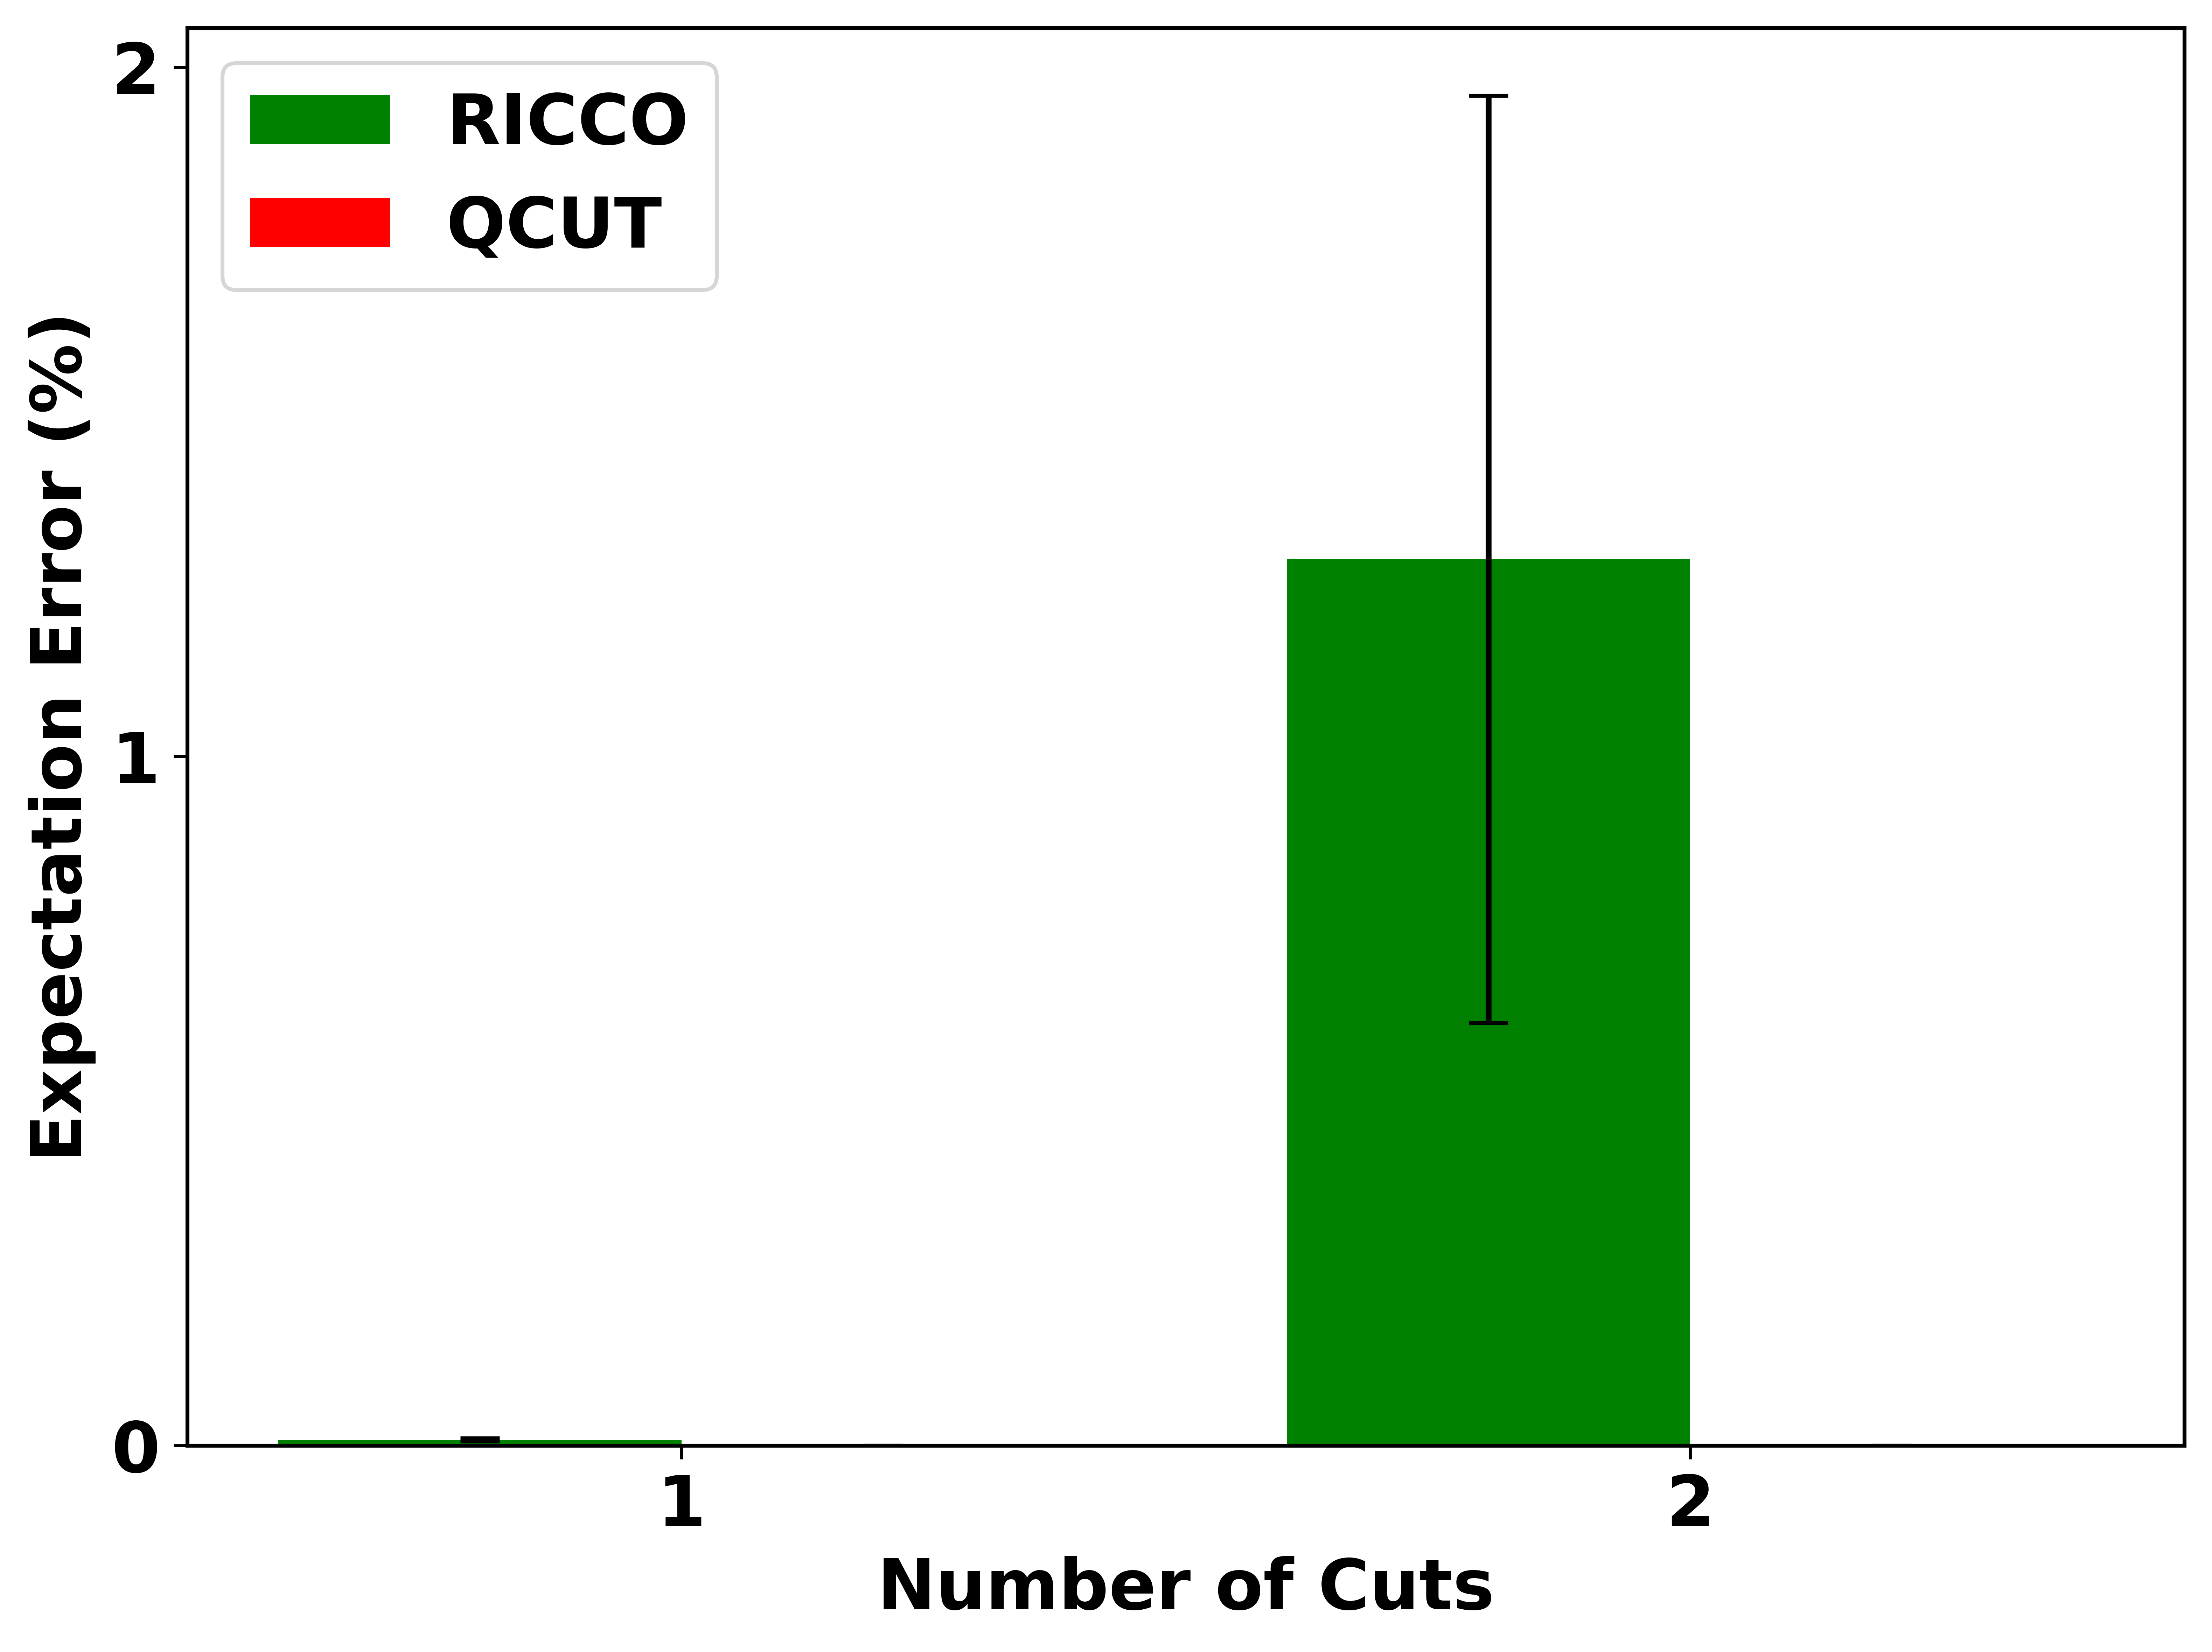

'empirical_plots/ricco_cutqc_expectation_error_95ci.pdf'

In [5]:
from scipy.stats import sem, t
# Re-run the modified code after the connection issue
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
df = pd.read_csv('df_main.csv')


# Correct the dataset by removing negative values for 'Expectation error (%)'
df['Expectation error (%)'] = df['Expectation error (%)'].abs()

# Calculate mean and standard deviation for 'Expectation error (%)'
mean_values = df.groupby(['Number of cuts', 'Method'])['Expectation error (%)'].mean().unstack()
std_values = df.groupby(['Number of cuts', 'Method'])['Expectation error (%)'].std().unstack()

# Calculate the 95% confidence intervals for error bars
confidence_level = 0.95
n_values = df.groupby(['Number of cuts', 'Method']).size().unstack()
sem_values = std_values / n_values**0.5  # Standard Error of the Mean

# Calculate the margin of error for the 95% confidence interval
t_value = t.ppf((1 + confidence_level) / 2, n_values - 1)
margin_of_error = sem_values * t_value

# Prepare the Matplotlib plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=800)  # High DPI for clarity

# Define colors for the methods
colors = {'RICCO': 'green', 'QCUT': 'red'}

# Plot bar chart with 95% confidence interval error bars
bar_width = 0.4
x_positions = mean_values.index
for i, method in enumerate(reversed(mean_values.columns)):
    ax.bar(
        x_positions + (i - 0.5) * bar_width,  # Adjust positions for bars
        mean_values[method],
        yerr=margin_of_error[method],  # 95% CI as error bars
        capsize=5,  # Size of error bar caps
        width=bar_width,
        label=method,
        color=colors.get(method, 'blue'),
    )

# Customize the plot
ax.set_xlabel("Number of Cuts", fontsize=18, fontweight="bold")
ax.set_ylabel("Expectation Error (%)", fontsize=18, fontweight="bold")
ax.set_xticks(x_positions)
ax.set_xticklabels(x_positions, fontsize=18, fontweight="bold")
for label in ax.get_yticklabels():
    label.set_fontsize(18)
    label.set_fontweight("bold")



# Add ticks to the axes for values
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer ticks on y-axis
ax.xaxis.set_major_locator(plt.MultipleLocator(1))  # Ensure consistent x-axis ticks



# Make the frame black and bold
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)  # Set frame line width to bold

# # Ensure bold formatting for the scientific notation text
# ax.yaxis.offsetText.set_fontsize(18)
# ax.yaxis.offsetText.set_fontweight('bold')

# Add legend
ax.legend(prop={"size": 18, "weight": "bold"}, loc="upper left")

# Turn off the grid
ax.grid(False)

# Ensure layout is tight for better spacing
fig.tight_layout()

# Save the plot
output_path = 'empirical_plots/ricco_cutqc_expectation_error_95ci.pdf'
plt.savefig(output_path, bbox_inches="tight")

# Show the plot
plt.show()

output_path


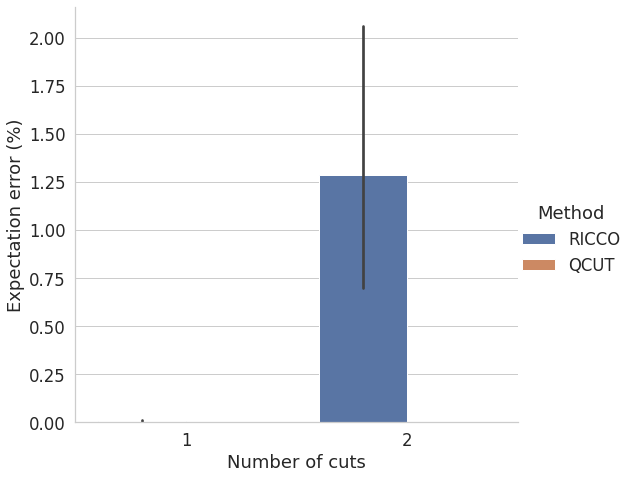

In [36]:
# Set the style and font scale for Seaborn to match Matplotlib settings
sns.set(style="whitegrid", font_scale=1.5)

sns.catplot(x='Number of cuts', y='Expectation error (%)', hue='Method', 
            kind='bar', height=7, aspect=1.1, data=df)

### Plot the Number of RICCO Optimization Executions

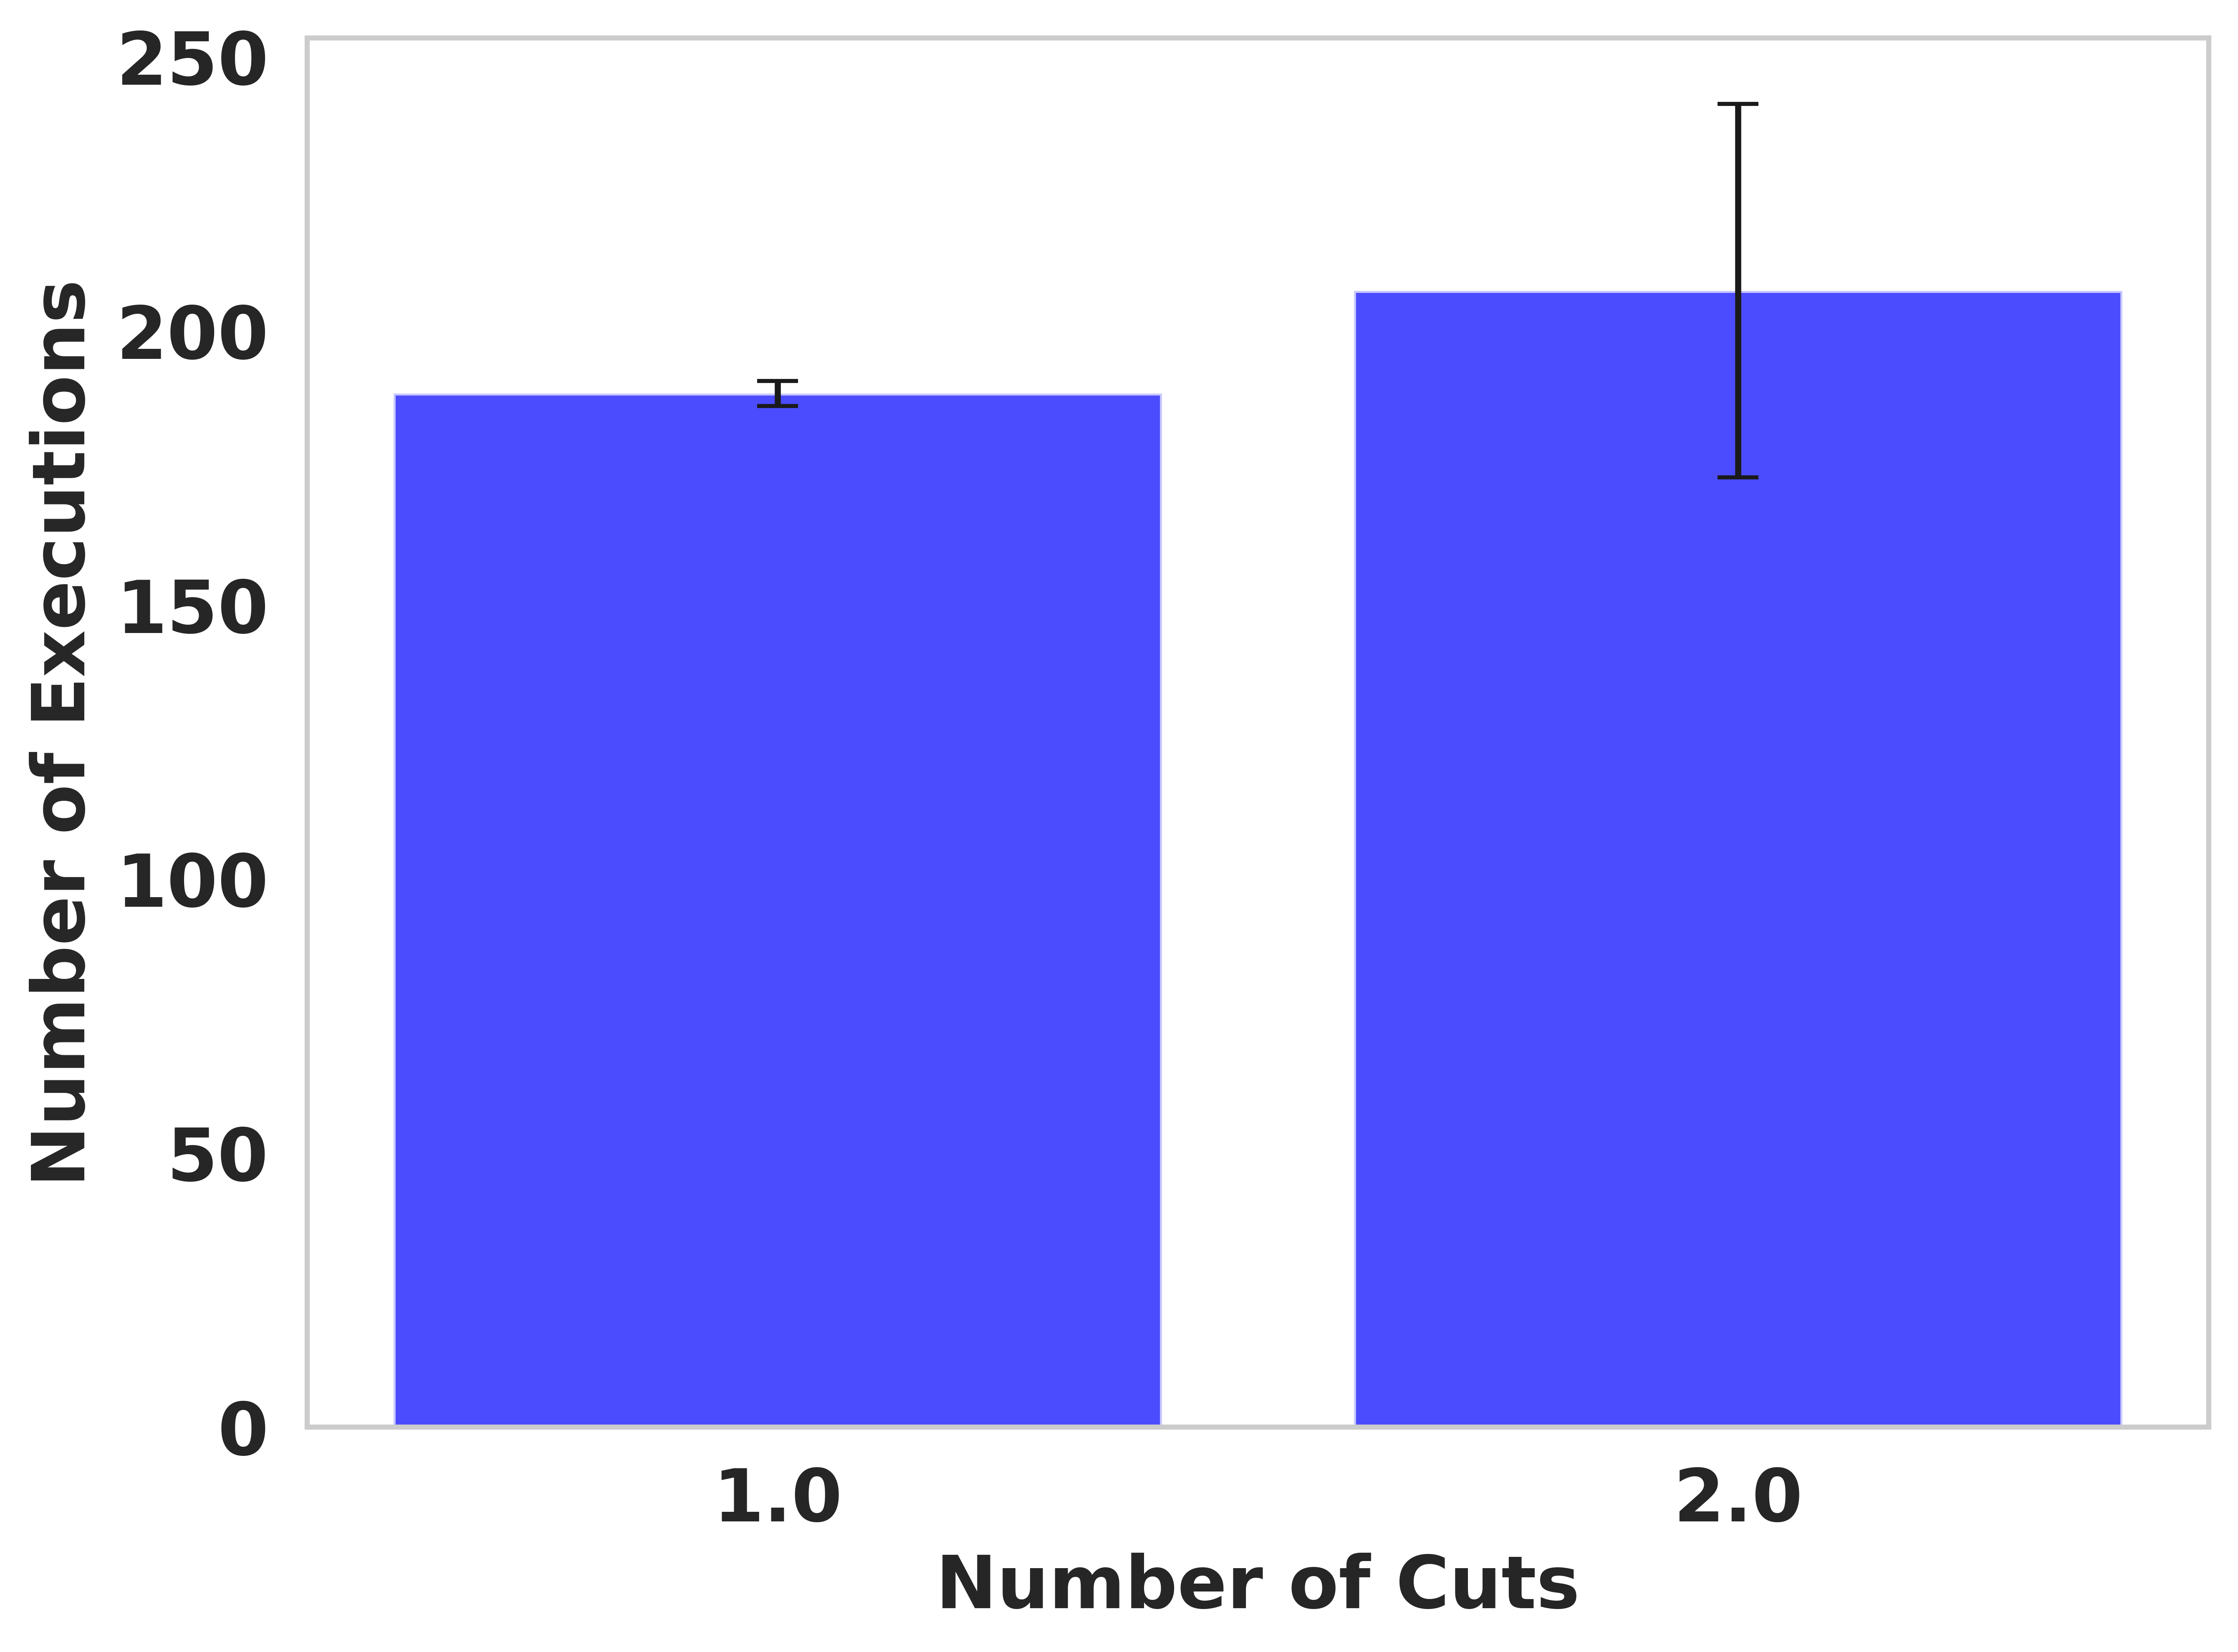

'empirical_plots/number_of_cuts_vs_executions_no_grid.pdf'

In [45]:
# Load the data for the new plot
df_params = pd.read_csv('df_params_main.csv')

# Prepare the Matplotlib plot for "Number of Cuts" vs "Number of Executions"
fig, ax = plt.subplots(figsize=(8, 6), dpi=700)  # High DPI for clarity

# Group by 'Number of cuts' to calculate mean and 95% CI for "Number of executions"
mean_values = df_params.groupby('Number of cuts')['Number of executions'].mean()
std_values = df_params.groupby('Number of cuts')['Number of executions'].std()
n_values = df_params.groupby('Number of cuts').size()
sem_values = std_values / n_values**0.5  # Standard Error of the Mean
t_value = t.ppf(0.975, n_values - 1)  # 95% confidence interval
margin_of_error = sem_values * t_value

# Define x positions for the bars
x_positions = mean_values.index

# Plot the bar chart with 95% confidence interval error bars
ax.bar(
    x_positions,
    mean_values,
    yerr=margin_of_error,  # 95% CI as error bars
    capsize=5,  # Size of error bar caps
    color="blue",
    alpha=0.7
)

# Customize the plot
ax.set_xlabel("Number of Cuts", fontsize=18, fontweight="bold")
ax.set_ylabel("Number of Executions", fontsize=18, fontweight="bold")
ax.set_xticks(x_positions)
ax.set_xticklabels(x_positions, fontsize=18, fontweight="bold")
for label in ax.get_yticklabels():
    label.set_fontsize(18)
    label.set_fontweight("bold")

# Turn off the grid
ax.grid(False)

# Ensure layout is tight for better spacing
fig.tight_layout()

# Save the plot
output_path = 'empirical_plots/number_of_cuts_vs_executions_no_grid.pdf'
plt.savefig(output_path, bbox_inches="tight")

# Show the plot
plt.show()

output_path


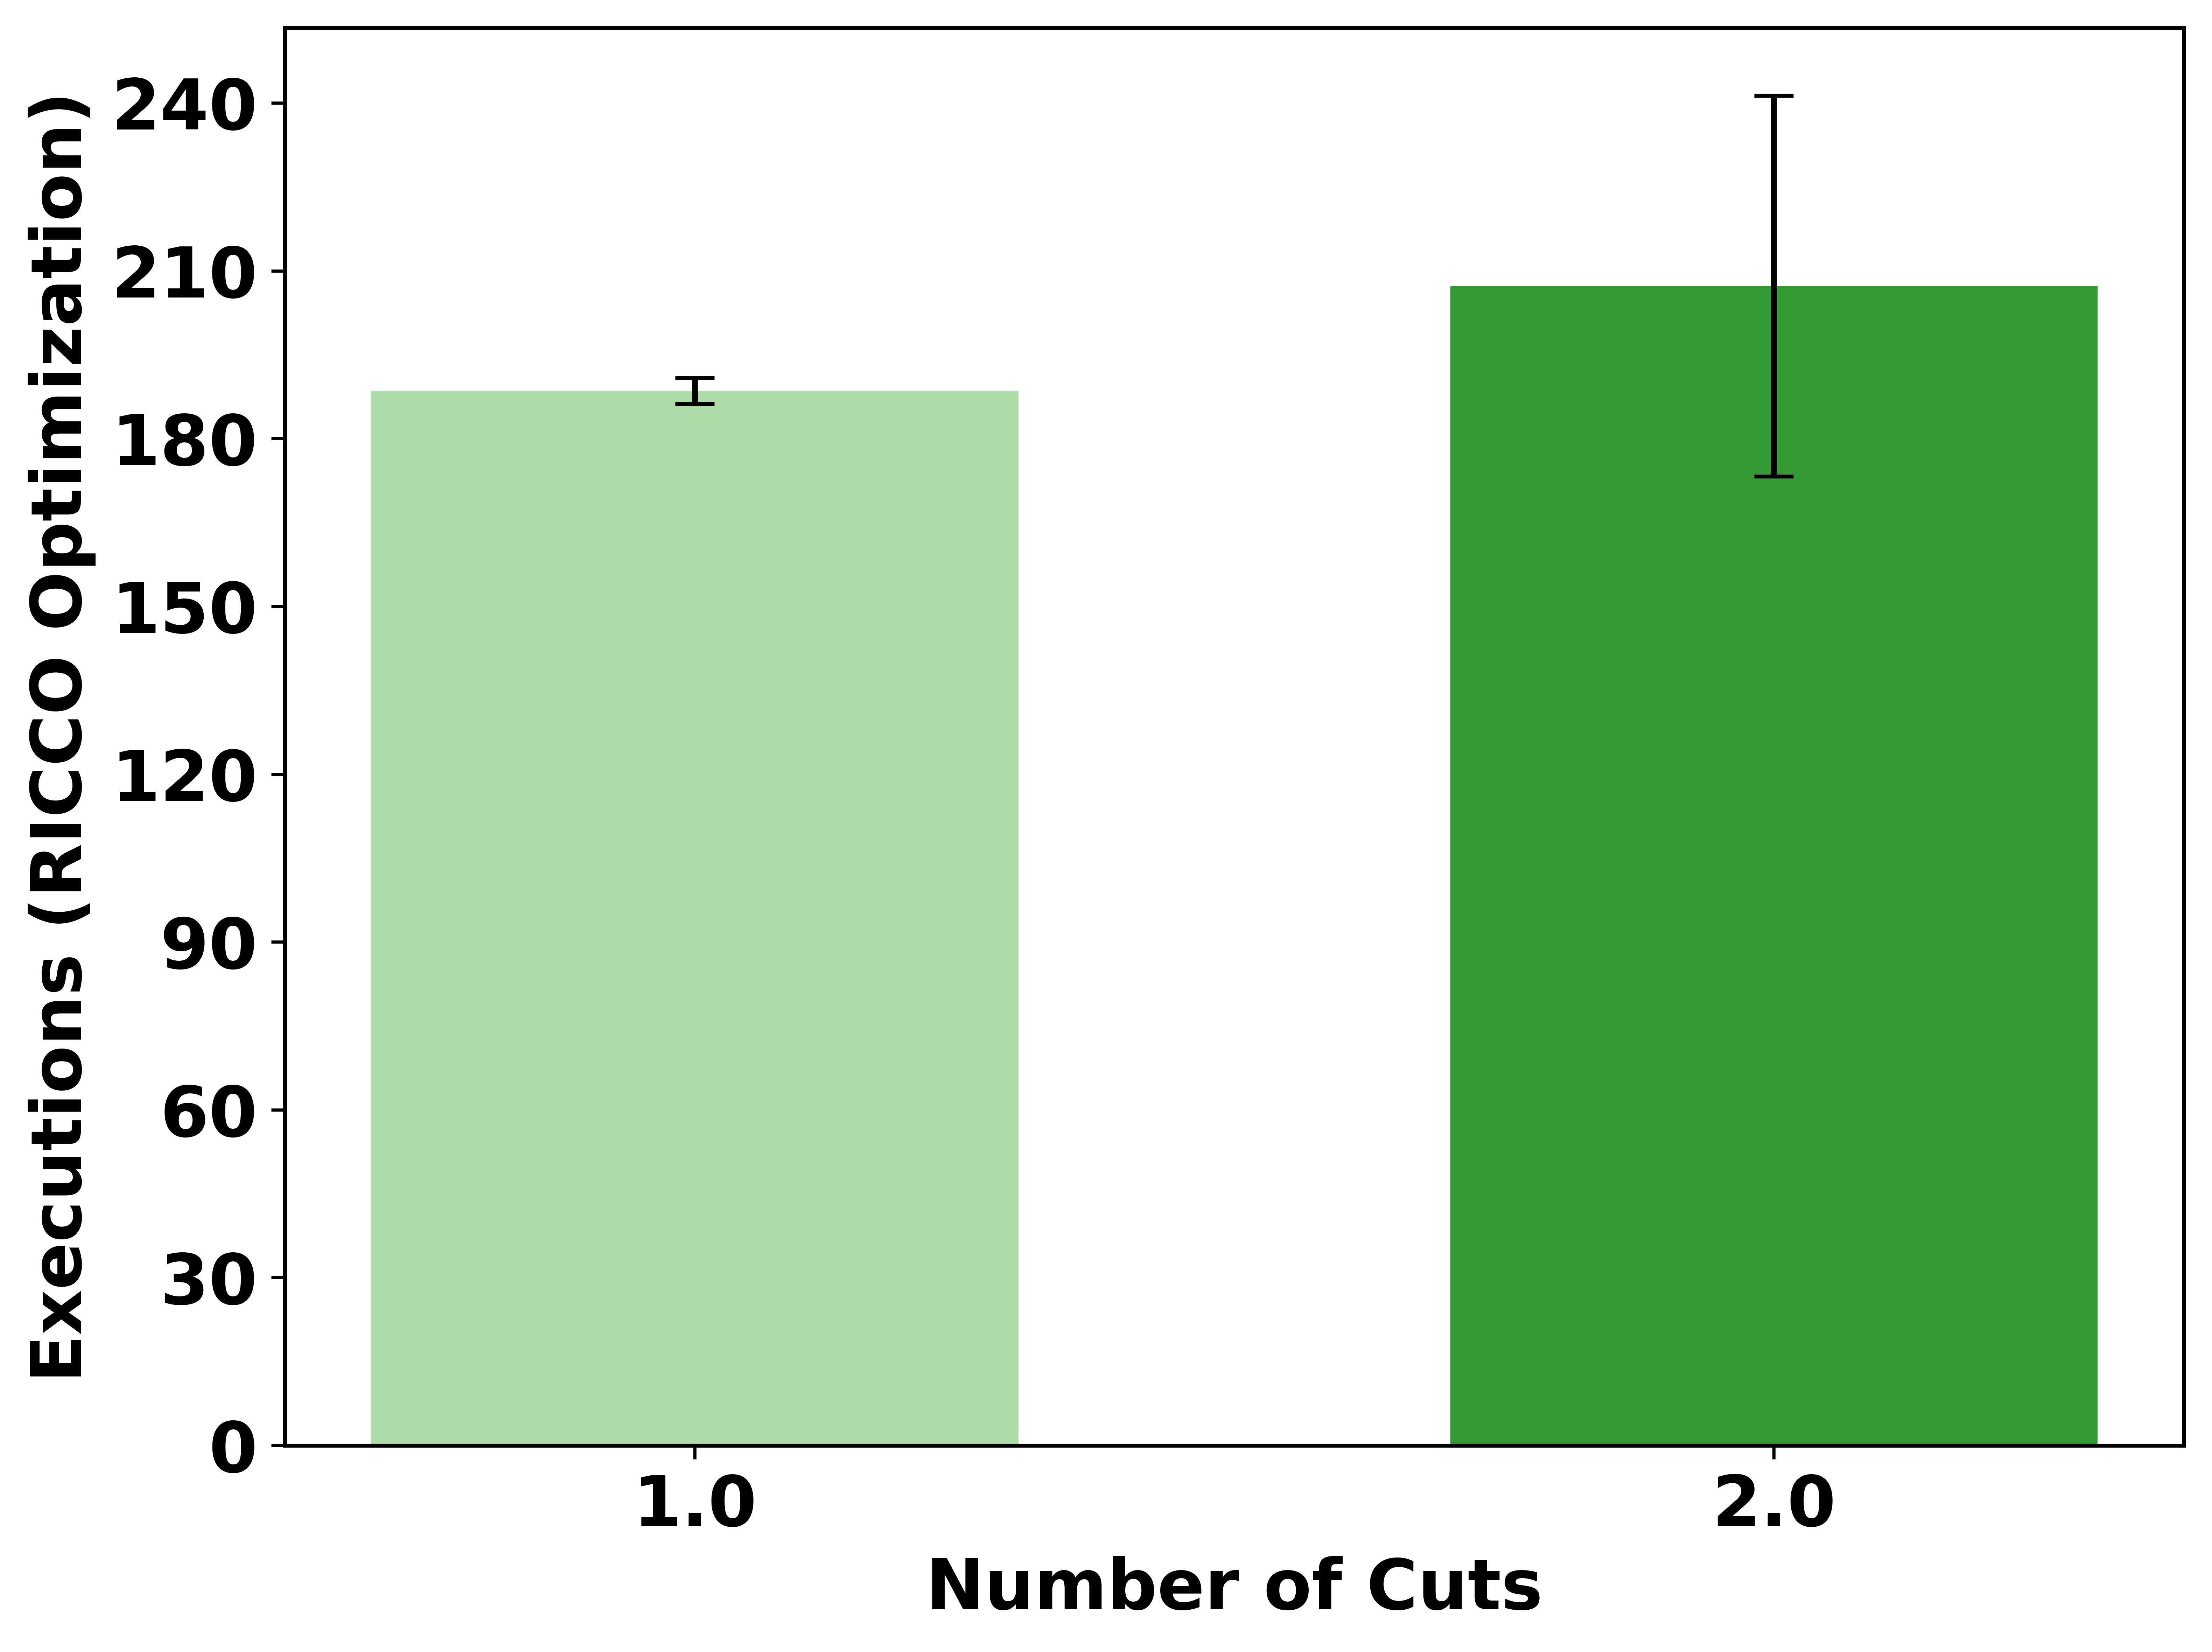

'empirical_plots/number_of_cuts_vs_executions_ricco_optimization.pdf'

In [6]:
# Load the data for the new plot
df_params = pd.read_csv('df_params_main.csv')

# Prepare the Matplotlib plot for "Number of Cuts" vs "Executions (RICCO Optimization)"
fig, ax = plt.subplots(figsize=(8, 6), dpi=800)  # High DPI for clarity

# Group by 'Number of cuts' to calculate mean and 95% CI for "Number of executions"
mean_values = df_params.groupby('Number of cuts')['Number of executions'].mean()
std_values = df_params.groupby('Number of cuts')['Number of executions'].std()
n_values = df_params.groupby('Number of cuts').size()
sem_values = std_values / n_values**0.5  # Standard Error of the Mean
t_value = t.ppf(0.975, n_values - 1)  # 95% confidence interval
margin_of_error = sem_values * t_value

# Define x positions for the bars
x_positions = mean_values.index

# Generate gradient shades of green for the bars
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(mean_values)))

colors = [colors[0], "green"]

# Plot the bar chart with 95% confidence interval error bars
for i, (x, y, err) in enumerate(zip(x_positions, mean_values, margin_of_error)):
    # if i ==1:
    #     color = colors[1]
    # else:
    #     color = "green"
    ax.bar(
        x,
        y,
        yerr=err,  # 95% CI as error bars
        capsize=5,  # Size of error bar caps
        color=colors[i],
        alpha=0.8,
        width=0.6
    )

# Customize the plot
ax.set_xlabel("Number of Cuts", fontsize=18, fontweight="bold")
ax.set_ylabel("Executions (RICCO Optimization)", fontsize=18, fontweight="bold")
ax.set_xticks(x_positions)
ax.set_xticklabels(x_positions, fontsize=18, fontweight="bold")
for label in ax.get_yticklabels():
    label.set_fontsize(18)
    label.set_fontweight("bold")


# Add ticks to the axes for values
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer ticks on y-axis
ax.xaxis.set_major_locator(plt.MultipleLocator(1))  # Ensure consistent x-axis ticks



# Make the frame black and bold
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)  # Set frame line width to bold
    
# Turn off the grid
ax.grid(False)

# Ensure layout is tight for better spacing
fig.tight_layout()

# Save the plot
output_path = 'empirical_plots/number_of_cuts_vs_executions_ricco_optimization.pdf'
plt.savefig(output_path, bbox_inches="tight")

# Show the plot
plt.show()

output_path


In [26]:
# Input variables
N_A_wires = 3
N_C_wires = 3
tolerance = 1e-12
group = "unitary"  # or "ortho"

In [3]:
# index_col = []
# for idx in range(500):
#     N_B_wires = random.randint(1,2)
#     ricco_dict, qcut_dict, opt_dict = ricco(N_A_wires, N_B_wires, N_C_wires, 
#                                  group, tolerance=1e-12)
#     if idx==0:
#         df = pd.DataFrame.from_dict(ricco_dict, orient='index').T
#         index_col.append(idx)
        
#         qcut_df = pd.DataFrame.from_dict(qcut_dict, orient='index').T
#         df = pd.concat([df, qcut_df], axis=0, ignore_index=True)
#         index_col.append(idx)
        
#         df_params = pd.DataFrame.from_dict(opt_dict, orient='index').T
        
#     else:
#         ricco_df = pd.DataFrame.from_dict(ricco_dict, orient='index').T
#         qcut_df = pd.DataFrame.from_dict(qcut_dict, orient='index').T
#         opt_df = pd.DataFrame.from_dict(opt_dict, orient='index').T
        
#         df = pd.concat([df, ricco_df], axis=0, ignore_index=True)
#         index_col.append(idx)
        
#         df = pd.concat([df, qcut_df], axis=0, ignore_index=True)
#         index_col.append(idx)
        
#         df_params = pd.concat([df_params, opt_df], axis=0, ignore_index=True)

# # df["index"] = index_col

In [27]:
df = pd.read_csv('df_main.csv')

In [28]:
df_params = pd.read_csv('df_params_main.csv')

In [29]:
sns.set(font_scale = 2)

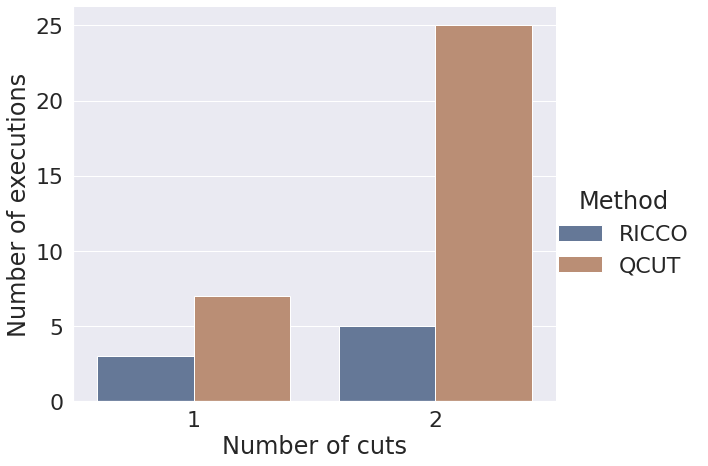

In [30]:
sns.catplot(x='Number of cuts', y='Number of executions', 
            hue='Method', kind='bar', saturation=.5,
            height=7, aspect=1.2, data=df)
plt.savefig('ricco_cutqc_executions.pdf')

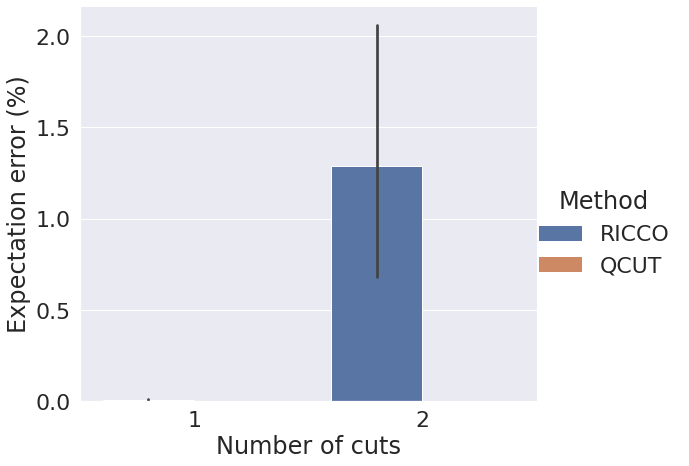

In [31]:
sns.catplot(x='Number of cuts', y='Expectation error (%)', hue='Method', 
            kind='bar', height=7, aspect=1.2, data=df)
plt.savefig('ricco_cutqc_expectation_error.pdf')

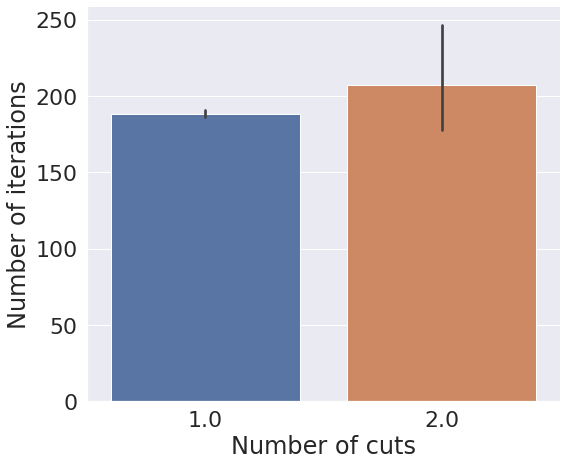

In [32]:
sns.catplot(x='Number of cuts', y='Number of iterations', 
            kind='bar', height=7, aspect=1.2, data=df_params)
plt.savefig('ricco_iterations.pdf')

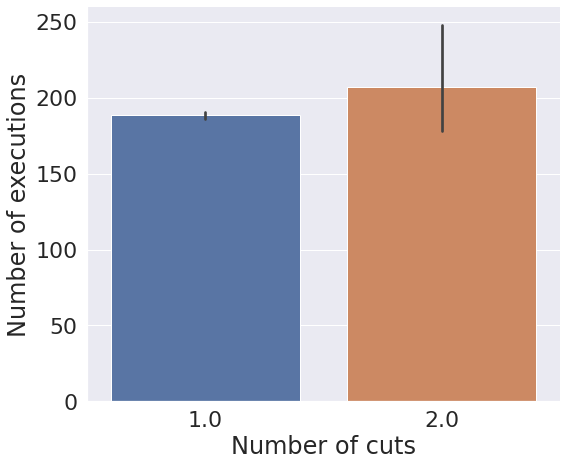

In [33]:
sns.catplot(x='Number of cuts', y='Number of executions', 
            kind='bar', height=7, aspect=1.2, data=df_params)
plt.savefig('ricco_circuit_opt_execution.pdf')

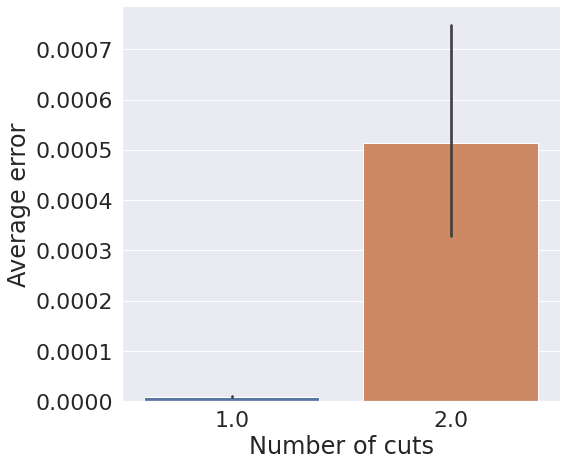

In [34]:
sns.catplot(x='Number of cuts', y='Average error', 
            kind='bar', height=7, aspect=1.2, data=df_params)
plt.savefig('ricco_non_z_error.pdf')